## Importações

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn

In [3]:
data = pd.read_csv('dadosTrain.csv')

In [32]:
data.head()

,Unnamed: 0,X,date,time,cc_num,merchant,category,amt,first,last,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,faixascategory,faixasjob,faixascity
0,1,0,2019-01-01,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,9,2,1
1,2,1,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,8,2,1
2,3,2,2019-01-01,00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,4,1
3,4,3,2019-01-01,00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2,3,7
4,5,4,2019-01-01,00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,1


In [4]:
data.dtypes

Unnamed: 0          int64
X                   int64
date               object
time               object
cc_num            float64
merchant           object
category           object
amt               float64
first              object
last               object
gender             object
street             object
city               object
state              object
zip                 int64
lat               float64
long              float64
city_pop            int64
job                object
dob                object
trans_num          object
unix_time           int64
merch_lat         float64
merch_long        float64
is_fraud            int64
faixascategory      int64
faixasjob           int64
faixascity          int64
distGeo           float64
dtype: object

In [5]:
data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [6]:
count_fraud = data['is_fraud'].value_counts()[1]
count_not_fraud = data['is_fraud'].value_counts()[0]

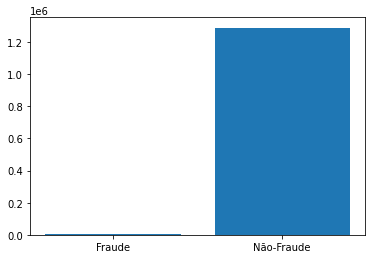

In [7]:
classes = ['Fraude', 'Não-Fraude']
values = [count_fraud, count_not_fraud]
plt.bar(classes, values)
plt.show()

## Aplicando técnicas de Over/Under sampling

In [8]:
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

In [9]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

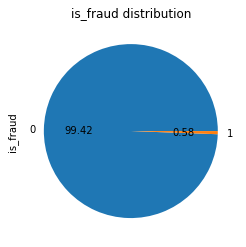

In [10]:
ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("is_fraud distribution")

## Random Undersampling

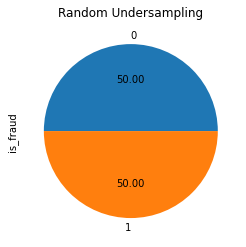

In [11]:
rus = RandomUnderSampler(sampling_strategy=1)
X_res_under, y_res_under = rus.fit_resample(X, y)

ax = y_res_under.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Undersampling")

In [12]:
y_res_under.value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [13]:
under_result = pd.concat([X_res_under, y_res_under], axis=1)

In [24]:
under_result.to_csv('undersample_data.csv')

## Random Oversampling

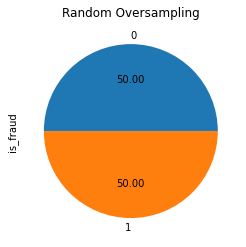

In [15]:
ros = RandomOverSampler(sampling_strategy=1)
X_res_over, y_res_over = ros.fit_resample(X, y)

ax = y_res_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Oversampling")

In [16]:
y_res_over.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [17]:
over_result = pd.concat([X_res_over, y_res_over], axis=1)

In [25]:
over_result.to_csv('oversample_data.csv')

## SMOTE

<AxesSubplot:>

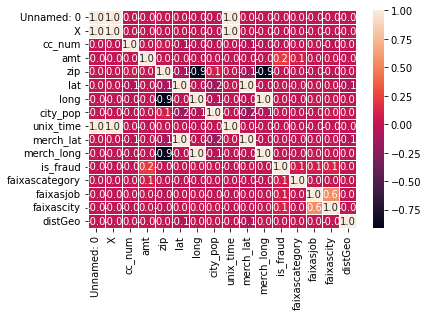

In [18]:
# verifica a correlação entre as variáveis do dataset
correlation = data.corr()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [19]:
atributes = ['amt', 'faixascategory', 'faixasjob', 'faixascity']
X = data[atributes]
y = data['is_fraud']

In [20]:
smt = SMOTE()
X_res_sm, y_res_sm = smt.fit_resample(X, y)

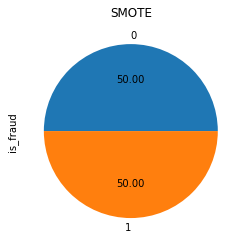

In [21]:
ax = y_res_sm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE")

In [22]:
y_res_sm.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [23]:
sm_result = pd.concat([X_res_sm, y_res_sm], axis=1)

In [26]:
sm_result.to_csv('smote_data.csv')